In [1]:
import numpy as np
import matplotlib.pyplot as plt
import sys
import os
import copy
import pandas as pd
import time
from sklearn.manifold import TSNE

In [2]:
# Kai's laptop
data_path = "C:\\Users\\kdmen\\Desktop\\Research\\Data\\$M\\PCA_40D\\"
metadata_cols_df = pd.read_pickle('C:\\Users\\kdmen\\Desktop\\Research\\Data\\$M\\metadata_cols_df.pkl')
# BRC Desktop
#data_path = "D:\\Kai_MetaGestureClustering_24\\saved_datasets\\"
#metadata_cols_df = pd.read_pickle('metadata_cols_df.pkl')

print("Loading")
start_time = time.time()

metadata_cols = ['Participant', 'Gesture_ID', 'Gesture_Num']

PCA_df = pd.read_pickle(data_path+'PCA_ms_IMUEMG_df.pkl')

# Dropping the metadata when we read it in!
training_u_df = pd.read_pickle(data_path+'training_u_df.pkl').drop(metadata_cols, axis=1)
test_users_df = pd.read_pickle(data_path+'test_users_df.pkl').drop(metadata_cols, axis=1)

end_time = time.time()
print(f"Completed in {end_time - start_time}s")

Loading
Completed in 5.040628671646118s


In [3]:
PCA_df.shape

(426752, 40)

In [5]:
num_rows_per_gesture = 64 # From the interp
num_gestures = len(PCA_df) // num_rows_per_gesture
num_features = PCA_df.shape[1]

# Ensure the data can be evenly divided into gestures
assert len(PCA_df) % num_rows_per_gesture == 0, "The total number of rows is not a multiple of the number of rows per gesture."

# Convert DataFrame to NumPy array
data_np = PCA_df.to_numpy()
# Reshape into (batch_dim, time_step, n_features) AKA (n_gestures, n_rows_per_gesture, n_columns)
PCA_np = data_np.reshape(num_gestures, num_rows_per_gesture, num_features)
#PCA_np = PCA_df.to_numpy()
flattened_PCA = PCA_np.reshape(num_gestures, -1)

In [6]:
flattened_PCA.shape

(6668, 2560)

In [7]:
def extract_features(sEMG_data, window_size=300, step_size=100):
    """
    Extract features from sEMG data by computing the covariance matrix
    over sliding windows and concatenating the 0-, 1-, and 2-diagonals.
    
    Parameters:
    sEMG_data (np.ndarray): The sEMG data matrix with shape (n_samples, n_channels)
    window_size (int): The size of the window to compute the covariance matrix
    step_size (int): The step size for the sliding window
    
    Returns:
    np.ndarray: The feature matrix with shape (n_windows, feature_size)
    """
    n_samples, n_channels = sEMG_data.shape
    features = []

    for start in range(0, n_samples - window_size + 1, step_size):
        window_data = sEMG_data[start:start + window_size]
        cov_matrix = np.cov(window_data, rowvar=False)
        diag_0 = np.diag(cov_matrix)
        diag_1 = np.diag(cov_matrix, k=1)
        diag_2 = np.diag(cov_matrix, k=2)
        feature_vector = np.concatenate([diag_0, diag_1, diag_2])
        features.append(feature_vector)

    return np.array(features)

def run_tsne(features, perplexity=35, n_components=2):
    """
    Apply t-SNE to the feature matrix.
    
    Parameters:
    features (np.ndarray): The feature matrix
    perplexity (int): The perplexity parameter for t-SNE
    n_components (int): The number of dimensions for the t-SNE embedding
    
    Returns:
    np.ndarray: The 2D t-SNE embedding of the features
    """
    tsne = TSNE(n_components=n_components, perplexity=perplexity)
    tsne_result = tsne.fit_transform(features)
    return tsne_result


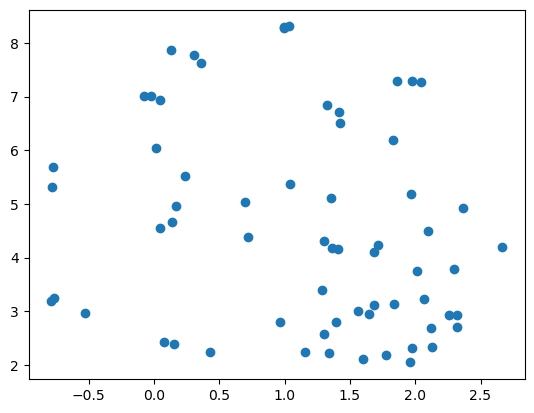

In [8]:
features = extract_features(flattened_PCA)
tsne_embedding = run_tsne(features)

# Visualization (e.g., using matplotlib)
plt.scatter(tsne_embedding[:, 0], tsne_embedding[:, 1])
plt.show()

In [10]:
features.shape

(64, 7677)

In [9]:
tsne_embedding.shape

(64, 2)